In [845]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import copy
import os

np.set_printoptions(precision=3)

# for colour palette
colours = ["#C96868", "#FADFA1", "#FEA405", "#CC66DA", "#7EACB5"]
pallete = plt.cm.colors.ListedColormap(colours)

# --- image main
save_dir = "../portfolio/themes/blog/static/images"
file_name = "2025-08-09-careful-seeding"

# we will also set the random seed to 1
seed = 1
np.random.seed(seed)

In [846]:
def create_random_init_gif(
    X,
    n,
    k,
    colours,
    init_c_func,
    num_iterations=100,
    save_path="random_init.gif",
    figsize=(5, 4),
):
    fig, ax = plt.subplots(figsize=figsize)

    scatter_data = ax.scatter(
        X[:, 0],
        X[:, 1],
        c="lightgrey",
        edgecolors="black",
        linewidths=1,
        alpha=0.4,
        s=40,
        zorder=1,
    )

    scatter_centroids = ax.scatter(
        [],
        [],
        c=colours[0],
        edgecolors="black",
        linewidths=1,
        alpha=0.8,
        s=40,
        zorder=2,
    )

    ax.tick_params(
        axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6
    )
    for s in ["top", "left", "right", "bottom"]:
        ax.spines[s].set_linewidth(0.5)

    plt.tight_layout()

    def animate(frame):
        C = init_c_func(X, n, k)
        scatter_centroids.set_offsets(C)

        return (scatter_centroids,)

    anim = animation.FuncAnimation(
        fig,
        animate,
        frames=num_iterations,
        interval=300,
        blit=False,
        repeat=True,
    )

    print(f"Saving GIF with {num_iterations} frames...")
    anim.save(save_path, writer=PillowWriter(fps=3), dpi=90)
    print(f"GIF saved as: {save_path}")

    plt.show()
    return anim

In [847]:
def phi(X, C):
    error = 0
    for x in X:
        min_dist = np.inf
        for c in C:
            dist = np.sum((x - c) ** 2)
            if dist < min_dist:
                min_dist = dist
        error += min_dist
    return error

In [848]:
k = 5
n = 100

X, _ = make_blobs(
    n_samples=n,
    cluster_std=0.5,
    centers=k,
    n_features=2,
    random_state=1,
)

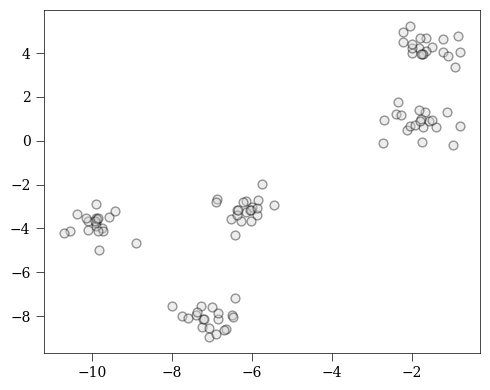

In [849]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-1.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [850]:
def init_c(X, n, k):
    return X[np.random.randint(0, n, size=k)]

Saving GIF with 100 frames...
GIF saved as: ../portfolio/themes/blog/static/images/2025-08-09-careful-seeding-2.gif


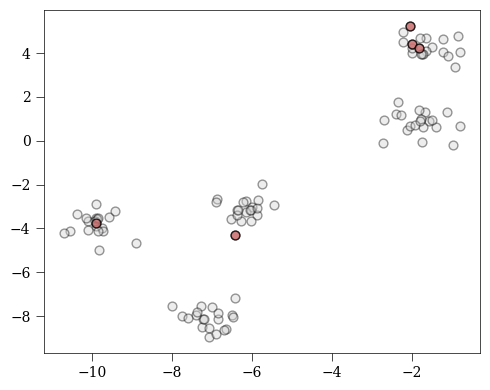

In [851]:
_ = create_random_init_gif(
    X, n, k, colours, init_c, save_path=f"{save_dir}/{file_name}-2.gif"
)

In [852]:
def update_w(X, C, n, k):
    w = np.zeros((n, k))
    for i in range(n):
        d = [np.sum((C[j] - X[i]) ** 2) for j in range(k)]
        nearest_center = np.argmin(d)
        w[i, nearest_center] = 1
    return w

In [853]:
C = init_c(X, n, k)
w = update_w(X, C, n, k)
w = np.argmax(w, axis=1)

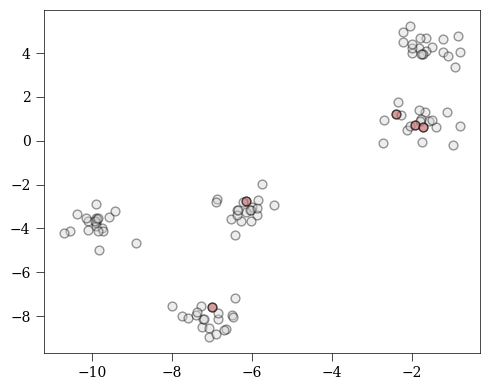

In [854]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)

plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colours[0],
    edgecolors="black",
    linewidths=1,
    alpha=0.6,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-2.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

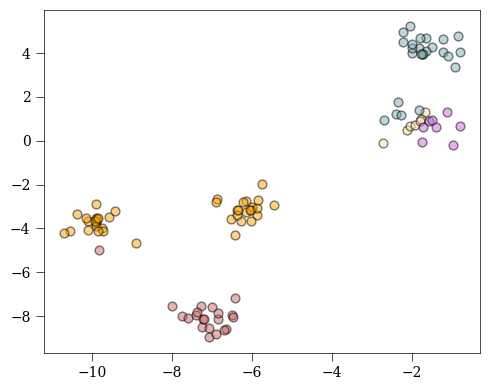

In [855]:
fig, ax = plt.subplots(figsize=(5, 4))

for i in range(k):
    plt.scatter(
        X[w == i, 0],
        X[w == i, 1],
        c=colours[i],
        edgecolors="black",
        linewidths=1,
        alpha=0.5,
        s=40,
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-3.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [856]:
def update_c(w, X):
    d = w.sum(axis=0).reshape(-1, 1)
    if np.any(d == 0):
        res = np.zeros_like(w.T @ X)
        mask = d != 0
        m_flat = mask.flatten()
        res[m_flat] = (w.T @ X)[m_flat] / d[mask]
        return res
    else:
        return w.T @ X / d

In [857]:
w = update_w(X, C, n, k)
C = update_c(w, X)

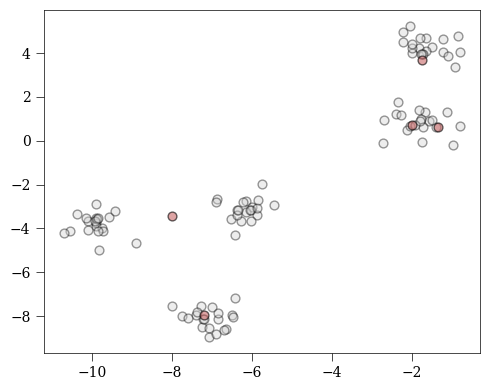

In [858]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)

plt.scatter(
    C[:, 0],
    C[:, 1],
    c=colours[0],
    edgecolors="black",
    linewidths=1,
    alpha=0.6,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [859]:
def update_c(w, X):
    d = w.sum(axis=0).reshape(-1, 1)
    if np.any(d == 0):
        res = np.zeros_like(w.T @ X)
        mask = d != 0
        m_flat = mask.flatten()
        res[m_flat] = (w.T @ X)[m_flat] / d[mask]
        return res
    else:
        return w.T @ X / d


def lloyd_algorithm(X, C, n, k, max_iters=100):
    C_current = C.copy()
    for _ in range(max_iters):
        w = update_w(X, C_current, n, k)
        C_current = update_c(w, X)
    return C_current, w

In [860]:
# C, _ = lloyd_algorithm(X, C, n, k, max_iters=100)

In [861]:
C = np.zeros((k, 2))
C[0] = X[np.random.choice(len(X))]

for i in range(1, k):
    D = []
    for x in X:
        min_dist = np.inf
        for c in C[:i]:
            d = np.sum((x - c) ** 2)
            if d < min_dist:
                min_dist = d
        D.append(min_dist)

    D = np.array(D)
    p = D / np.sum(D)
    C[i] = X[np.random.choice(len(X), p=p)]

In [862]:
def kmeans_pp(X, k):
    C = np.zeros((k, X.shape[1]))
    C[0] = X[np.random.choice(len(X))]

    for i in range(1, k):
        D = []
        for x in X:
            min_dist = np.inf
            for c in C[:i]:
                d = np.sum((x - c) ** 2)
                if d < min_dist:
                    min_dist = d
            D.append(min_dist)

        D = np.array(D)
        p = D / np.sum(D)
        C[i] = X[np.random.choice(len(X), p=p)]

    return C

In [863]:
C, _ = lloyd_algorithm(X, C, n, k, max_iters=100)

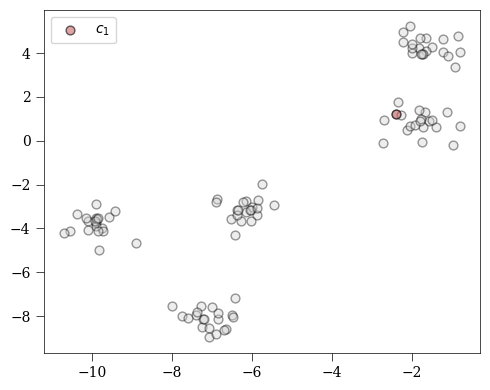

In [864]:
c1 = X[np.random.choice(len(X))]

fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)

plt.scatter(
    c1[0],
    c1[1],
    c=colours[0],
    edgecolors="black",
    linewidths=1,
    alpha=0.6,
    s=40,
    label="$c_1$",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-5.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [865]:
D = []
for x in X:
    d = np.sum((x - c1) ** 2)
    D.append(d)

D = np.array(D)
p = D / np.sum(D)

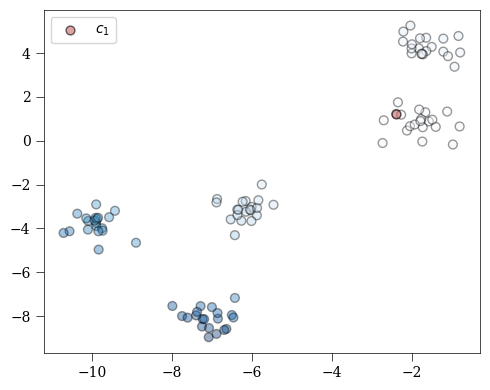

In [866]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=p,
    edgecolors="black",
    cmap="Blues",
    linewidths=1,
    alpha=0.4,
    s=40,
)

plt.scatter(
    c1[0],
    c1[1],
    c=colours[0],
    edgecolors="black",
    linewidths=1,
    alpha=0.6,
    s=40,
    label="$c_1$",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-6.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [867]:
c2 = X[np.random.choice(len(X), p=p)]

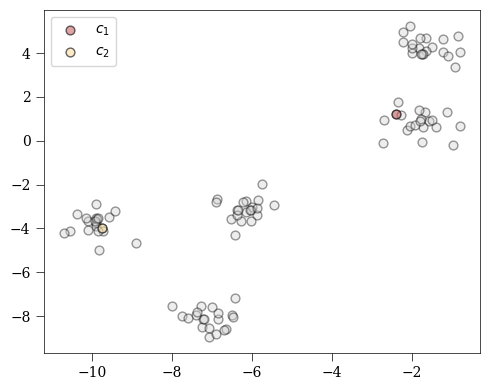

In [868]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)

plt.scatter(
    c1[0],
    c1[1],
    c=colours[0],
    edgecolors="black",
    linewidths=1,
    alpha=0.6,
    s=40,
    label="$c_1$",
)

plt.scatter(
    c2[0],
    c2[1],
    c=colours[1],
    edgecolors="black",
    linewidths=1,
    alpha=0.6,
    s=40,
    label="$c_2$",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-7.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [869]:
# lemma 3.1.
_phi = lambda X, C: np.sum(np.linalg.norm(X - C, axis=1) ** 2)

rows = np.random.randint(10, 100)
cols = np.random.randint(1, 10)

A = np.random.rand(rows, cols)
c = np.mean(A, axis=0)

E = 0
for i in range(len(A)):
    E += _phi(A, A[i])

print(np.allclose(E / len(A), 2 * _phi(A, c)))

True


In [870]:
X, C = make_blobs(
    n_samples=100, centers=3, cluster_std=1.0, n_features=2, random_state=None
)

A = X[C == 0]

Z = [X[np.random.choice(len(X))] for _ in range(2)]

In [871]:
def compute_d(a, Z):
    return np.min([np.linalg.norm(a - z) for z in Z])

In [872]:
# Compute D(a) for each point in A (distance to nearest existing center)

D = [compute_d(a, Z) for a in A]

In [873]:
E = 0

for i, a0 in enumerate(A):
    P_a0 = D[i] ** 2 / sum(d**2 for d in D)
    E += P_a0 * _phi(A, np.array([[a0]]))

E

151.8986563355842

In [874]:
opt_c = np.mean(X[C == 0], axis=0)

_phi(A, opt_c)

70.97985055730324

Uncomment if you want to run, takes very long time...

In [876]:
# CHECK = []
# ratios = []

# for _ in range(10_000_000):
#     X, C = make_blobs(
#         n_samples=100, centers=3, cluster_std=1.0, n_features=2, random_state=None
#     )

#     A = X[C == 0]
#     Z = [X[np.random.choice(len(X))] for _ in range(2)]
#     opt_c = np.mean(A, axis=0)

#     D = [compute_d(a, Z) for a in A]
#     E = 0
#     for i, a0 in enumerate(A):
#         P_a0 = D[i] ** 2 / sum(d**2 for d in D)
#         E += P_a0 * _phi(A, np.array([[a0]]))

#     ratios.append(E / _phi(A, opt_c))

In [877]:
# print(f"E ratio: {np.mean(ratios):.2f}")
# print(f"Max ratio observed: {max(ratios):.2f}")
# print(f"Individual violations: {sum(1 for r in ratios if r > 8)}")
# print(f"E value <= 8? {np.mean(ratios) <= 8}")

In [878]:
k = 5
n = 100

X, C_OPT = make_blobs(
    n_samples=n,
    cluster_std=0.5,
    centers=k,
    n_features=2,
    random_state=1,
)

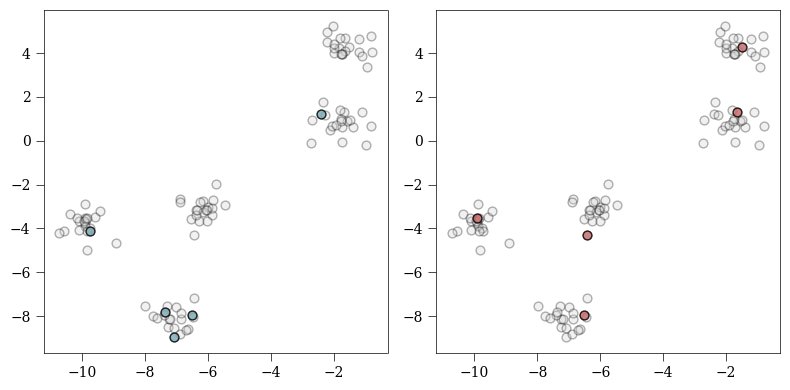

In [879]:
np.random.seed(1)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

C = init_c(X, n, k)

ax[0].scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=40,
)
for c in C:
    ax[0].scatter(
        c[0],
        c[1],
        c=colours[-1],
        edgecolors="black",
        linewidths=1,
        alpha=0.8,
        s=40,
    )
ax[0].tick_params(
    axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6
)
for s in ["top", "left", "right", "bottom"]:
    ax[0].spines[s].set_linewidth(0.5)

C = kmeans_pp(X, k)

ax[1].scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.3,
    s=40,
)
for c in C:
    ax[1].scatter(
        c[0],
        c[1],
        c=colours[0],
        edgecolors="black",
        linewidths=1,
        alpha=0.8,
        s=40,
    )
ax[1].tick_params(
    axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6
)
for s in ["top", "left", "right", "bottom"]:
    ax[1].spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-8.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [880]:
k = 3
n = 100

X, C_OPT = make_blobs(
    n_samples=n,
    cluster_std=0.9,
    centers=k,
    n_features=2,
    random_state=10,
)

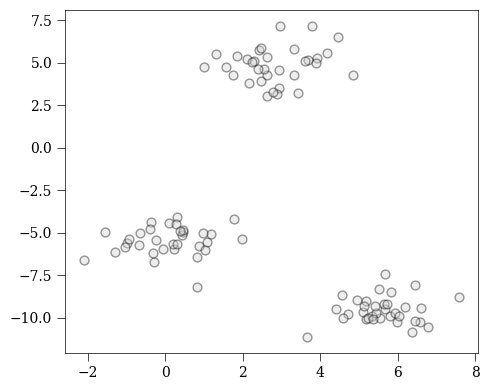

In [881]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    X[:, 0],
    X[:, 1],
    c="lightgrey",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
# plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-9.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

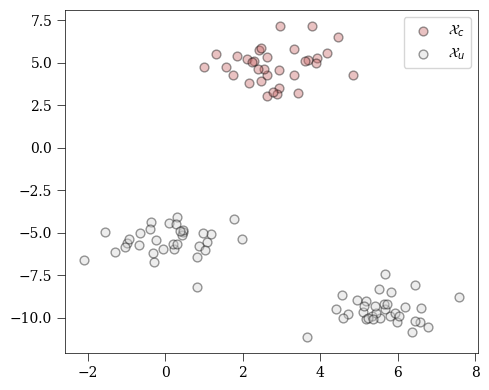

In [ ]:
np.random.seed(1)

c1 = X[np.random.choice(len(X))]
c = C_OPT[np.argwhere(X == c1)[0][0]]

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    X[C_OPT == c][:, 0],
    X[C_OPT == c][:, 1],
    c=colours[0],
    label="$\mathcal{X}_c$",
    edgecolors="black",
    linewidths=1,
    alpha=0.4,
    s=40,
)

plt.scatter(
    X[C_OPT != c][:, 0],
    X[C_OPT != c][:, 1],
    c="lightgrey",
    edgecolors="black",
    label="$\mathcal{X}_u$",
    linewidths=1,
    alpha=0.4,
    s=40,
)


ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-10.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1015]:
phi_xc = _phi(X[C_OPT == c], c1)

In [1017]:
phi_xu = _phi(X[C_OPT != c], c1)

In [1020]:
prob_c = phi_xc / (phi_xc + phi_xu)
print(prob_c)

0.0074873205203997584


In [1022]:
1-.0074873205203997584

0.9925126794796002